Chopra Spectrum

-to do-:
damping ratio vectorization


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
n_eq = 11

# eq = np.zeros(22, dtype = np.ndarray)

# for i in range(0,n_eq):
#     eq[i] = 
    
eq_list = [np.squeeze(pd.read_csv(f"GMs\EQ{i+1}.txt").values) for i in range(n_eq)]

In [3]:
shapes = [eq_list[i].shape for i in range(n_eq)]

In [4]:
ndata = max(shapes)[0]

delta_t = np.zeros(n_eq)
delta_t = np.array([0.01,0.005,0.005,0.005,0.005,0.005,0.01,0.01,0.02,0.01,0.005])

eq = np.zeros((n_eq, ndata))
for i in range(n_eq):
    eq[i] = np.concatenate((eq_list[i], np.zeros(ndata - len(eq_list[i]))), axis = 0)

In [5]:
del eq_list
print(shapes)
print(np.max(shapes))
print(eq.shape)
# print(n_data)

[(3999,), (4154,), (7988,), (5176,), (9624,), (7998,), (5589,), (1359,), (1999,), (4187,), (5999,)]
9624
(11, 9624)


In [6]:
np.max(np.abs(eq),axis = -1)

array([0.614473, 0.60252 , 0.577423, 0.589738, 0.617016, 0.719468,
       0.583886, 0.616724, 0.553254, 0.678429, 0.626712])

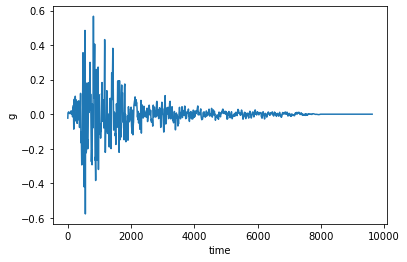

In [7]:
plt.plot(eq[2]);
plt.xlabel('time');
plt.ylabel('g');

In [8]:
# ndata = eq.shape[0]

In [9]:
# implicit
gama = 0.5
beta = 0.25

# explicit
# gama = 0.5
# beta = 1/6

In [10]:
n_period = 1000
ksi = 0.05
k = 1.
# delta_t = 0.001

period = np.linspace(0.0001,5, num = n_period)

u = np.zeros((n_period, n_eq, 3, ndata), dtype=float)

# u[ T , n_eq , disp-vel-acc, n_data]
#                             k[ T ,]
#                             c[ T ,]
#                    p[ n_eq, n_data]

m = k * (period ** 2) / ( 4 * (np.pi ** 2))
# k = 4 * (np.pi ** 2) * m / (period ** 2)
c = 2 * m * ksi * np.sqrt(k/m)


p = (-1.) * eq[:, np.newaxis, :] * m[:, np.newaxis, np.newaxis, np.newaxis] * 9.81

u[:,:,2,0] = (p[:,:,0,0] - c[:,np.newaxis] * u[:,:,1,0] - k * u[:,:,0,0]) / m[:,np.newaxis]
a1 = (m[:,np.newaxis] / (beta * (delta_t ** 2))) + (gama * c[:,np.newaxis]) / (beta * delta_t)
a2 = (m[:,np.newaxis] / (beta * delta_t)) + ((gama/beta) - 1) * c[:,np.newaxis]
a3 = ((1/(2 * beta)) - 1) * m[:,np.newaxis] + delta_t * ((gama/(2 * beta)) - 1) * c[:,np.newaxis]
k_star = k + a1

In [11]:
for i in range(0,ndata-1):
    p_star = p[:,:,0,i+1] + a1 * u[:,:,0,i] + a2 * u[:,:,1,i] + a3 * u[:,:,2,i]
    u[:,:,0,i+1] = p_star / k_star
    u[:,:,1,i+1] = gama * (u[:,:,0,i+1]-u[:,:,0,i]) / (beta * delta_t) + u[:,:,1,i] * (1 - gama/beta) + delta_t * u[:,:,2,i] * (1 - gama/(2*beta))
    u[:,:,2,i+1] = (u[:,:,0,i+1]-u[:,:,0,i]) / (beta * (delta_t ** 2)) - u[:,:,1,i] / (beta * delta_t) - u[:,:,2,i] * ((1 / (2*beta)) - 1)

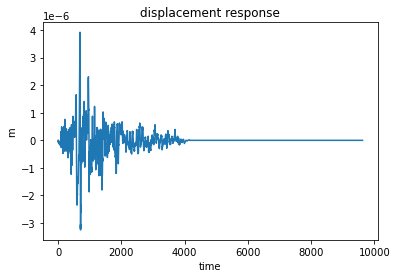

In [12]:
plt.plot(u[1,1,0,:]); # T -- n_eq -- 3 -- n_data
plt.xlabel('time');
plt.ylabel('m');
plt.title('displacement response');

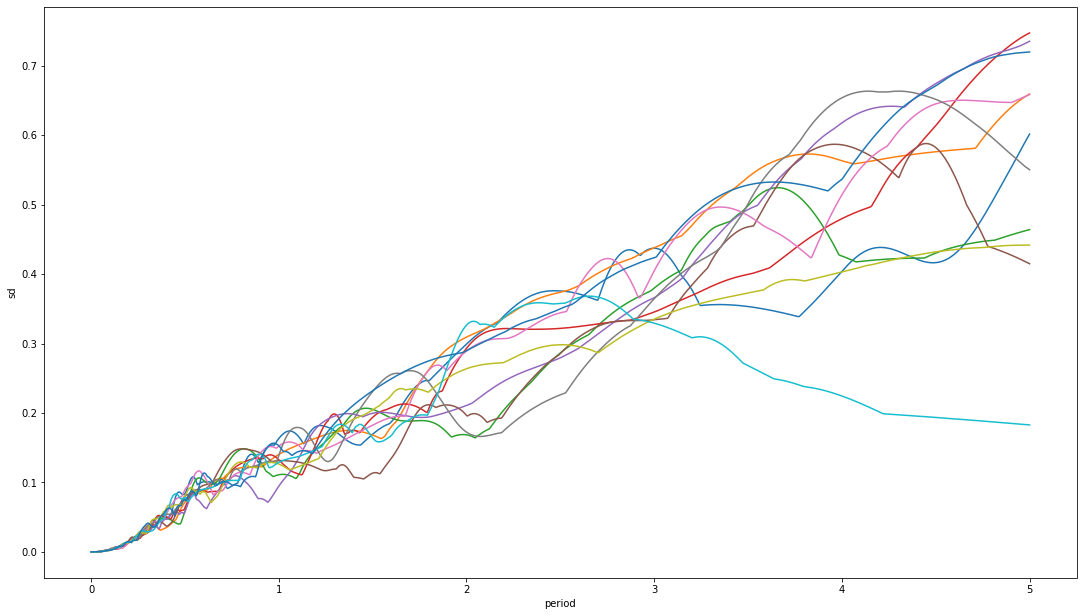

In [13]:
plt.plot(period, np.max(np.abs(u[:,:,0,:]),axis=-1));
plt.xlabel('period');
plt.ylabel('sd');
fig = plt.gcf()
fig.set_size_inches(18.5, 10.5)

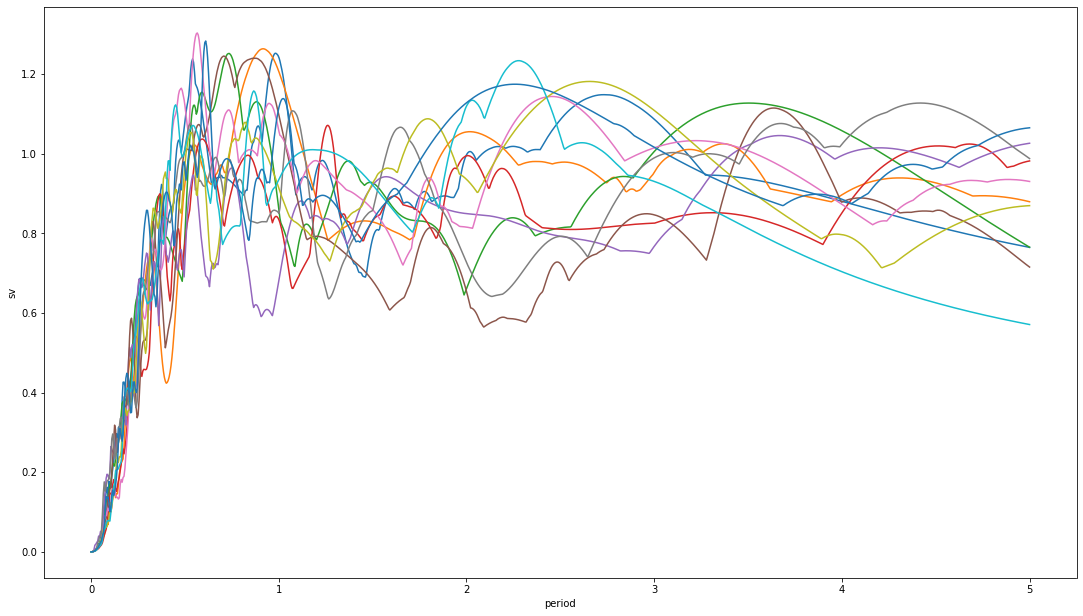

In [14]:
plt.plot(period, np.max(np.abs(u[:,:,1,:]),axis=-1));
plt.xlabel('period');
plt.ylabel('sv');
fig = plt.gcf()
fig.set_size_inches(18.5, 10.5)

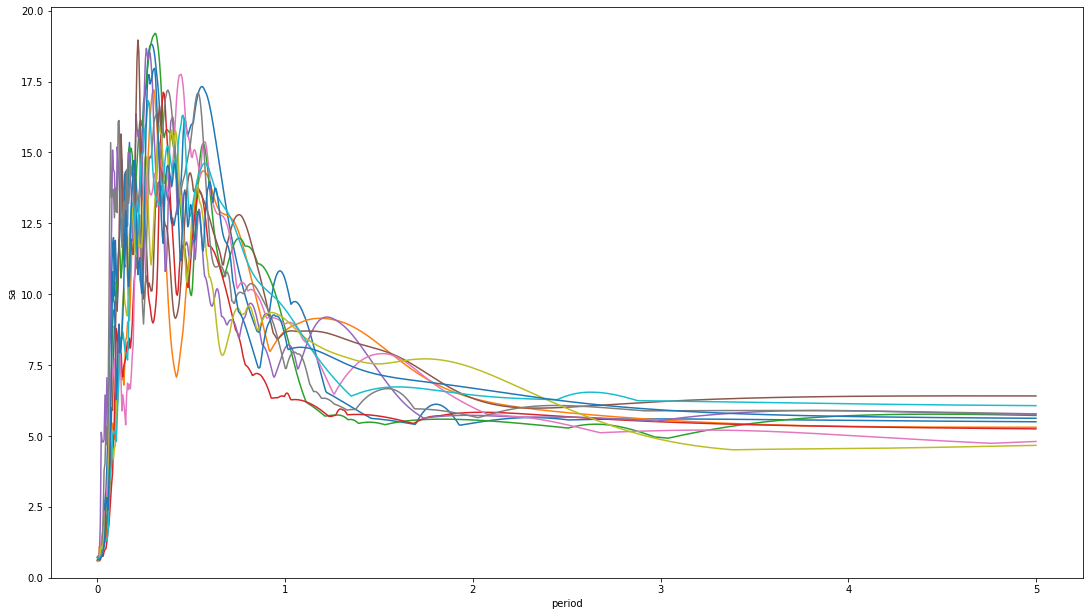

In [15]:
plt.plot(period, np.max(np.abs(u[:,:,2,:] + eq),axis=-1));
plt.xlabel('period');
plt.ylabel('sa');
plt.ylim(bottom = 0);
fig = plt.gcf()
fig.set_size_inches(18.5, 10.5)

In [25]:
%lsmagic

Available line magics:
%alias  %alias_magic  %autoawait  %autocall  %automagic  %autosave  %bookmark  %cd  %clear  %cls  %colors  %conda  %config  %connect_info  %copy  %ddir  %debug  %dhist  %dirs  %doctest_mode  %echo  %ed  %edit  %env  %gui  %hist  %history  %killbgscripts  %ldir  %less  %load  %load_ext  %loadpy  %logoff  %logon  %logstart  %logstate  %logstop  %ls  %lsmagic  %macro  %magic  %matplotlib  %mkdir  %more  %notebook  %page  %pastebin  %pdb  %pdef  %pdoc  %pfile  %pinfo  %pinfo2  %pip  %popd  %pprint  %precision  %prun  %psearch  %psource  %pushd  %pwd  %pycat  %pylab  %qtconsole  %quickref  %recall  %rehashx  %reload_ext  %ren  %rep  %rerun  %reset  %reset_selective  %rmdir  %run  %save  %sc  %set_env  %store  %sx  %system  %tb  %time  %timeit  %unalias  %unload_ext  %who  %who_ls  %whos  %xdel  %xmode

Available cell magics:
%%!  %%HTML  %%SVG  %%bash  %%capture  %%cmd  %%debug  %%file  %%html  %%javascript  %%js  %%latex  %%markdown  %%perl  %%prun  %%pypy  %%python 

In [36]:
%%svg

UsageError: %%svg is a cell magic, but the cell body is empty.
